#STUDENT PERFORMANCE ANALYSIS


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import joblib
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('/content/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [80]:
df.shape

(10000, 6)

In [81]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [82]:
df.duplicated().sum()

np.int64(127)

In [83]:
df.drop_duplicates(inplace=True)

In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [86]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [87]:
df.dtypes

,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,object
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,float64


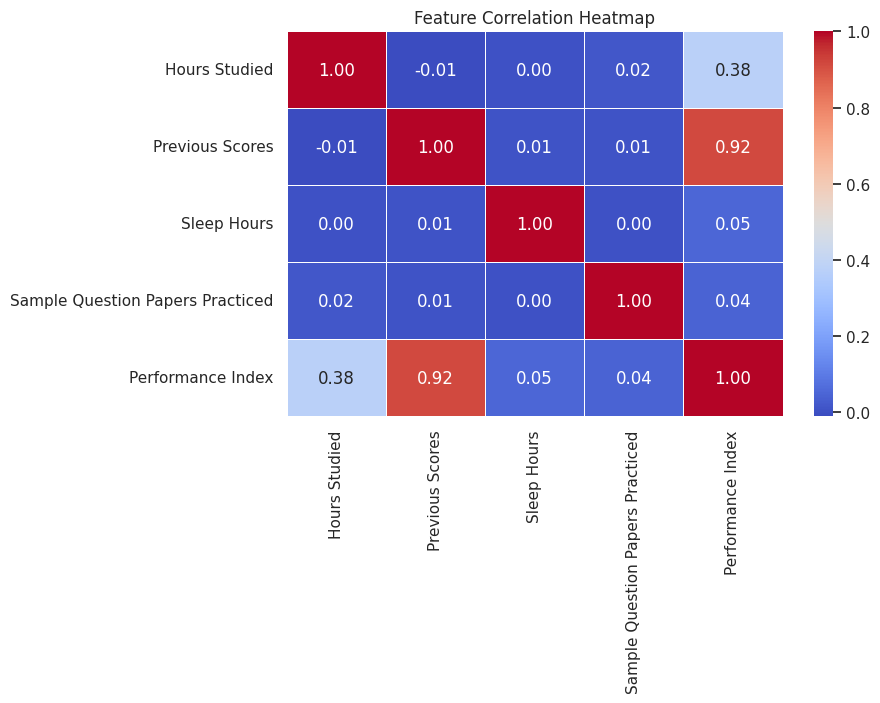

In [88]:
# Correlation heatmap
plt.figure(figsize=(8,5))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [89]:
# Set style
sns.set(style="whitegrid")

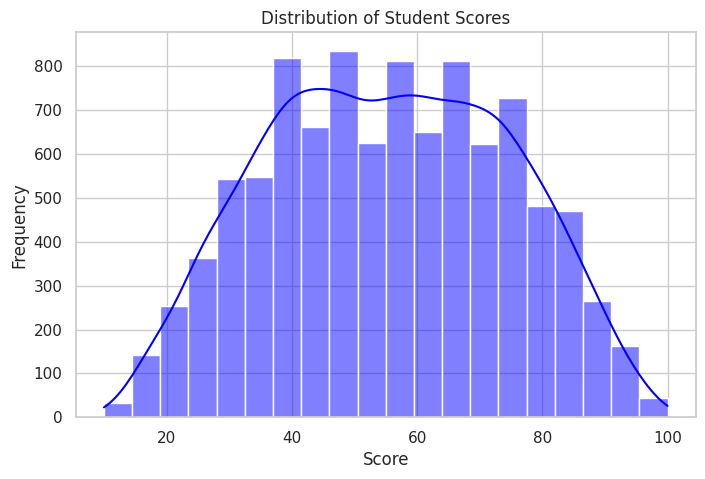

In [90]:
# Visualizing the distribution of student scores
plt.figure(figsize=(8,5))
# Check if 'Score' is in the columns, if not, try 'Scores', otherwise try 'Performance Index'
score_column = 'Score' if 'Score' in df.columns else 'Scores' if 'Scores' in df.columns else 'Performance Index'
sns.histplot(df[score_column], bins=20, kde=True, color='blue')
plt.title("Distribution of Student Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

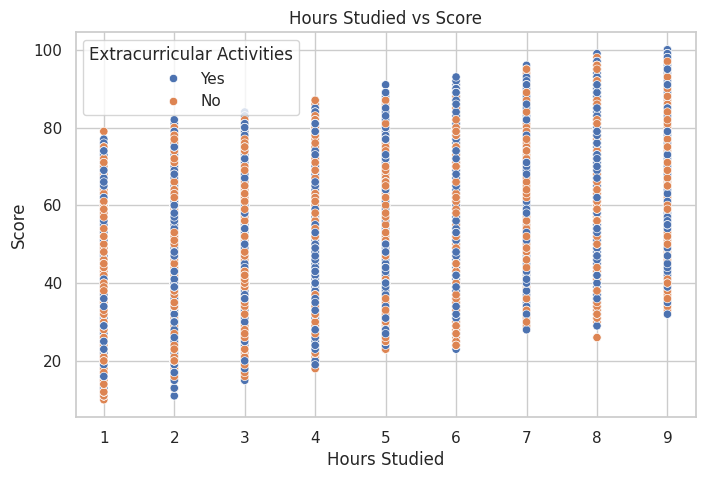

In [91]:
# Scatter plot: Hours Studied vs Score
plt.figure(figsize=(8,5))
# Assuming the actual column names are 'Hours Studied' and 'Extracurricular Activities'
# Update these if your column names are different.
# Use the score_column variable defined previously
sns.scatterplot(x=df['Hours Studied'], y=df[score_column], hue=df['Extracurricular Activities'])
plt.title("Hours Studied vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

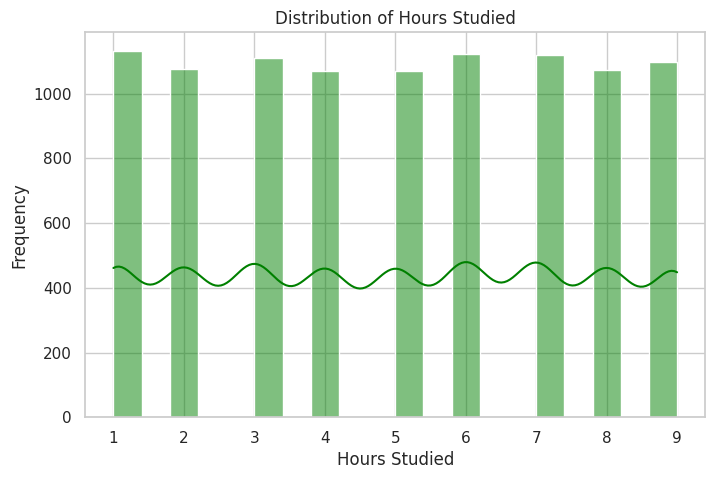

In [92]:
# Histogram: Hours Studied Distribution
plt.figure(figsize=(8,5))
# Use 'Hours Studied' instead of 'Hours_Studied'
sns.histplot(df['Hours Studied'], bins=20, kde=True, color='green')
plt.title("Distribution of Hours Studied")
plt.xlabel("Hours Studied")
plt.ylabel("Frequency")
plt.show()

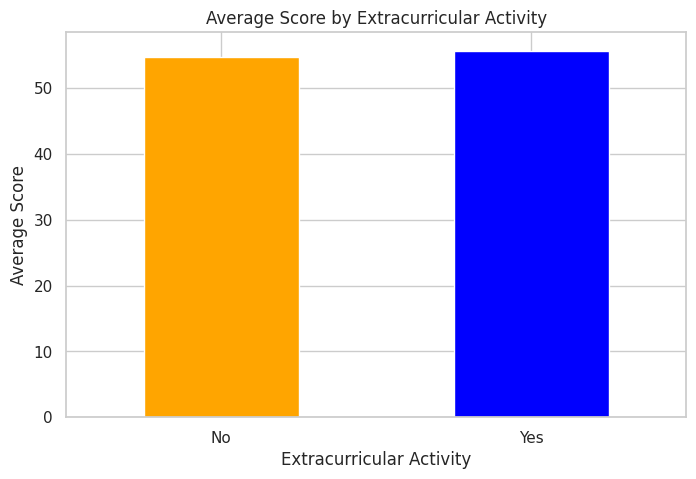

In [93]:
#Bar Chart: Average Score by Extracurricular Activity
plt.figure(figsize=(8,5))
# Use 'Extracurricular Activities' instead of 'Extracurricular' for the groupby
# Use the score_column variable which dynamically finds the score column
df.groupby("Extracurricular Activities")[score_column].mean().plot(kind="bar", color=["orange", "blue"])
plt.title("Average Score by Extracurricular Activity")
plt.xlabel("Extracurricular Activity")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

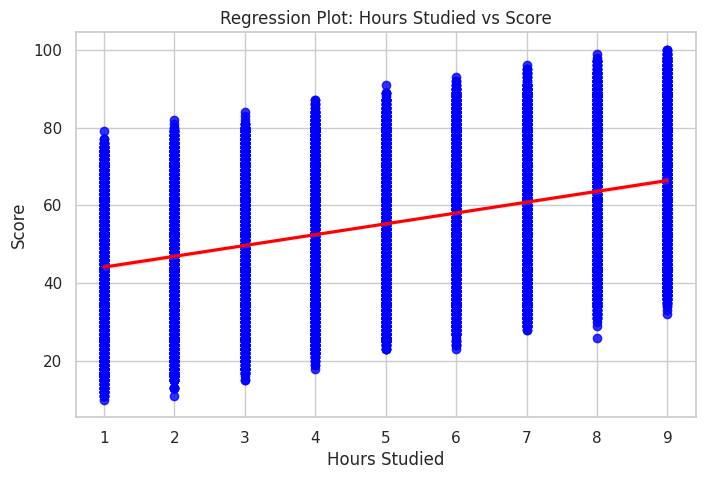

In [94]:
#Regression Plot – Hours Studied vs Score (With Trend Line)
plt.figure(figsize=(8,5))
# Replace 'Hours_Studied' with 'Hours Studied' to match the actual column name
# Use score_column for the y-axis for dynamic score column selection
sns.regplot(x=df["Hours Studied"], y=df[score_column], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot: Hours Studied vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

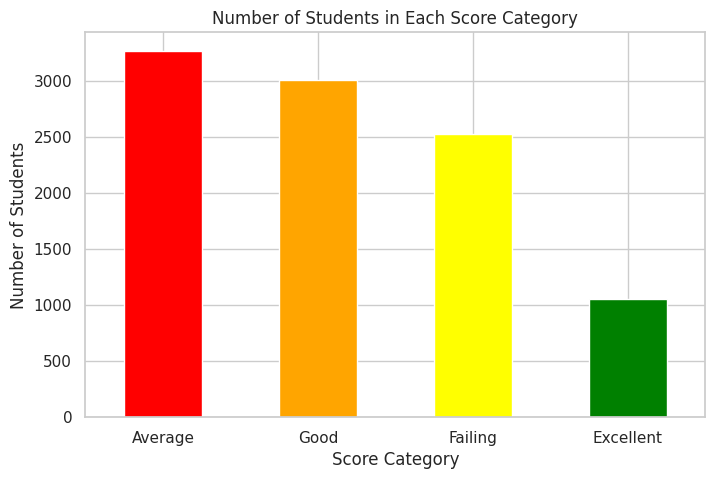

In [95]:
#Stacked Bar Chart – Comparing Students in Different Score Ranges
score_bins = [0, 40, 60, 80, 100]
score_labels = ["Failing", "Average", "Good", "Excellent"]
# Replace 'Score' with 'Performance Index' as the DataFrame likely has a column named 'Performance Index' instead of 'Score'
df["Score Category"] = pd.cut(df["Performance Index"], bins=score_bins, labels=score_labels)

plt.figure(figsize=(8,5))
df["Score Category"].value_counts().plot(kind="bar", color=["red", "orange", "yellow", "green"])
plt.title("Number of Students in Each Score Category")
plt.xlabel("Score Category")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.show()

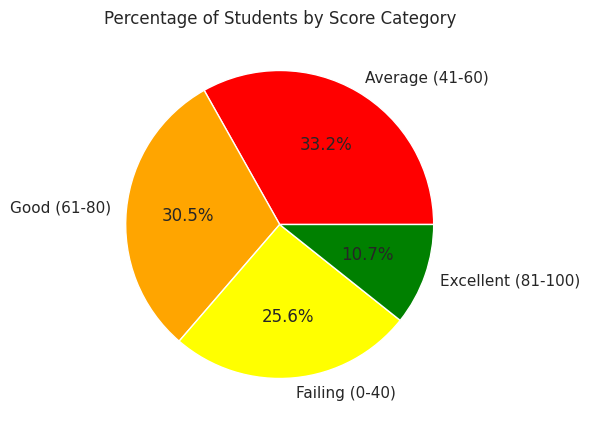

In [96]:
#Pie Chart: Percentage of Students in Each Score Range
score_bins = [0, 40, 60, 80, 100]
score_labels = ["Failing (0-40)", "Average (41-60)", "Good (61-80)", "Excellent (81-100)"]
# Replace 'Score' with 'Performance Index', as that's the likely score column
df["Score Category"] = pd.cut(df["Performance Index"], bins=score_bins, labels=score_labels)

plt.figure(figsize=(8,5))
df["Score Category"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["red", "orange", "yellow", "green"])
plt.title("Percentage of Students by Score Category")
plt.ylabel("")  # Remove the default ylabel
plt.show()

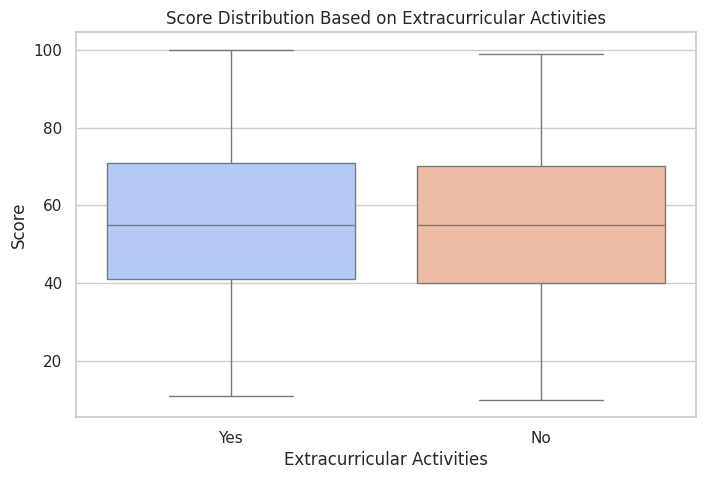

In [97]:
plt.figure(figsize=(8,5))
# Replace 'Extracurricular' with 'Extracurricular Activities'
# Replace 'Score' with 'Performance Index' or whichever column you use for score
sns.boxplot(x=df["Extracurricular Activities"], y=df["Performance Index"], palette="coolwarm")
plt.title("Score Distribution Based on Extracurricular Activities")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Score")
plt.show()

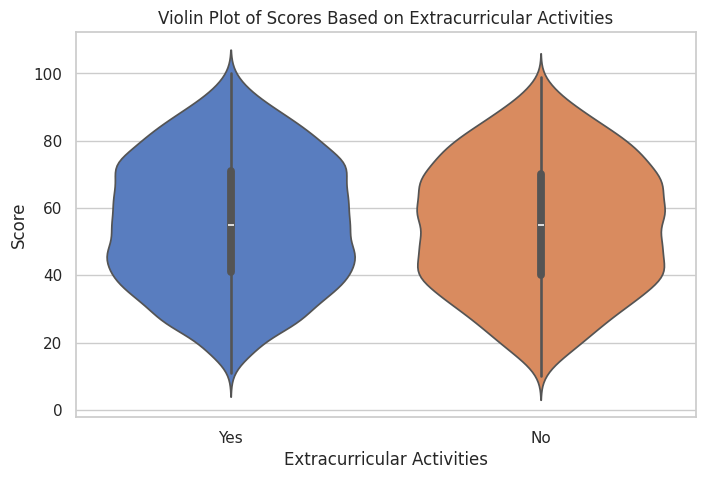

In [98]:
#Violin Plot: Hours Studied vs Score
plt.figure(figsize=(8,5))
# Replace 'Extracurricular' with 'Extracurricular Activities'
# Replace 'Score' with 'Performance Index' or whichever column you use for score
sns.violinplot(x=df["Extracurricular Activities"], y=df["Performance Index"], palette="muted")
plt.title("Violin Plot of Scores Based on Extracurricular Activities")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Score")
plt.show()

In [99]:
# Encode categorical variable (Yes -> 1, No -> 0)
label_encoder = LabelEncoder()
df["Extracurricular Activities"] = label_encoder.fit_transform(df["Extracurricular Activities"])

In [100]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [101]:
# Encode categorical variable (Yes -> 1, No -> 0)
label_encoder = LabelEncoder()
df["Extracurricular Activities"] = label_encoder.fit_transform(df["Extracurricular Activities"])

In [102]:
# Define features (X) and target (y)
# Exclude 'Score Category' from features
X = df.drop(columns=["Performance Index", "Score Category"])  # Drop 'Score Category'
y = df["Performance Index"]

In [103]:
# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [105]:
# Evaluate model performance
# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_rf_pred))

In [106]:

# Ensure R² Score is valid before printing
if np.isnan(r2_rf):
    accuracy_msg = "R² Score calculation failed. Got NaN."
else:
    accuracy_msg = f"Model Accuracy: {r2_rf * 100:.2f}%"

In [107]:
# Print results
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(accuracy_msg)

Mean Absolute Error (MAE): 1.90
R² Score: 0.9848
Root Mean Squared Error (RMSE): 2.38
Model Accuracy: 98.48%


In [108]:

# Save the trained model to a file
joblib.dump(rf_model, "student_performance_model.pkl")

['student_performance_model.pkl']

In [109]:
print("Model saved successfully as 'student_performance_model.pkl'")

Model saved successfully as 'student_performance_model.pkl'


In [110]:

!pip install streamlit pyngrok


In [111]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load the saved Random Forest model
model = joblib.load("student_performance_model.pkl")

st.set_page_config(page_title="Student Performance App", layout="centered")
st.title("🎓 Student Performance Analysis")

# Inputs
hours_studied = st.slider("Hours Studied", 0.0, 24.0, 2.0)
previous_scores = st.slider("Previous Scores (%)", 0, 100, 50)
sleep_hours = st.slider("Sleep Hours", 0.0, 12.0, 6.0)
sample_papers = st.slider("Sample Papers Practiced", 0, 50, 10)
extra = st.radio("Extracurricular Activities", ["Yes", "No"])
extra_encoded = 1 if extra == "Yes" else 0

if st.button("Analyze"):
    data = np.array([[hours_studied, previous_scores, sleep_hours, sample_papers, extra_encoded]])
    result = model.predict(data)[0]
    st.success(f"📈 Predicted Performance Score: {result:.2f}")


Overwriting app.py


In [112]:
from google.colab import files
uploaded = files.upload()


Saving Performance (2).ipynb to Performance (2) (1).ipynb


In [ ]:
!ngrok authtoken 2vl8xQXPu1pGsk6VPCb17CbSAdP_3pNdjReMEbzMurzudF5SD
from pyngrok import ngrok
import os
import time
sleep = time.sleep(5)

# Kill any previous tunnels
!pkill streamlit

# Create a tunnel to the default Streamlit port (8501)
public_url = ngrok.connect(addr=8501)
print("🌐 Streamlit app is live at:", public_url)

# Run the Streamlit app
!streamlit run app.py &
sleep.time(5)


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🌐 Streamlit app is live at: NgrokTunnel: "https://0759-104-196-122-143.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.122.143:8501

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
